# EDA - California Housing Dataset

Autor: Gallileu Genesis 

### Objetivos:
O objetivo da Análise Exploratória de Dados (EDA) é entender a estrutura e os relacionamentos dentro do conjunto de dados e identificar inconsistências, "sujeiras", padrões, outliers e outros recursos de interesse. É uma etapa inicial no processo de análise de dados e é uma etapa crucial antes de aplicar qualquer modelo estatístico ou de aprendizado de máquina aos dados.

Alguns objetivos específicos da EDA incluem:

- Familiarizar-se com os dados e sua estrutura
- Identificando dados ausentes ou incorretos
- Efetuar eventuais correções nos dados
- Detecção de outliers e anomalias
- Entendendo a distribuição de cada variável
- Identificando relações e padrões entre variáveis
- Gerando hipóteses para análise ou modelagem posterior

Em geral, o objetivo da EDA é usar métodos visuais e estatísticos para obter insights sobre os dados e identificar áreas para investigação posterior. É um processo iterativo que permite ao analista refinar e melhorar sua compreensão dos dados à medida que novos insights são obtidos.


## Parte I

O objetivo dessa etapa é realizar uma exploração mais visual, a fim de familiarizar-se com os dados e sua estrutura e identificar dados ausentes, duplicados ou incorretos e, por fim, realizar eventuais correções, se for o caso.

In [50]:
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

bold = ['\033[1m', '\033[0m']

### Banco de dados

O banco de dados de treinamento possui 37137 amostras (entradas/linhas), 8 colunas (features/recursos), além das colunas id e target.

In [51]:
train = pd.read_csv("Data/train.csv")
print(train.shape)
train.head()

(37137, 10)


id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   0    2.39     15.00      3.83       1.11     1280.00      2.49     34.60   
1   1    3.72     17.00      6.01       1.05     1504.00      3.81     38.69   
2   2    4.78     27.00      6.54       1.10     1061.00      2.46     34.71   
3   3    2.41     16.00      3.35       0.97     1255.00      2.09     32.66   
4   4    3.75     52.00      4.28       1.07     1793.00      1.60     37.80   

   Longitude  MedHouseVal  
0    -120.12         0.98  
1    -121.22         0.95  
2    -120.45         1.58  
3    -117.09         1.34  
4    -122.41         4.50

O banco de dados de teste possui 24759 amostras (entradas/linhas), 8 colunas (features/recursos), além da coluna id.

In [4]:
test = pd.read_csv("Data/test.csv")
print(test.shape)
test.head()

(24759, 9)


id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0  37137    1.71     35.00      4.97       1.10     1318.00      2.84   
1  37138    1.39     22.00      4.19       1.10     2296.00      3.18   
2  37139    7.72     21.00      7.13       0.96     1535.00      2.89   
3  37140    4.68     49.00      4.77       1.05      707.00      1.74   
4  37141    3.13     25.00      3.77       1.08     4716.00      2.00   

   Latitude  Longitude  
0     39.75    -121.85  
1     33.95    -118.29  
2     33.61    -117.81  
3     34.17    -118.34  
4     34.17    -118.29

### Informação de dados ausentes:

Abaixo estão três métodos para analisar a existência de dados ausentes (você só precisa usar um, se quiser). Nenhum dado ausente foi encontrado (tão bom que parece mentira).

O método .info() é útil para obter uma descrição rápida dos dados, em particular o número total de linhas, o tipo de cada atributo e o número de valores não nulos.

In [6]:
# vamos obter um resumo conciso do DataFrame.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


Percebemos que a quantidade de valores não nulos é igual ao total de entradas do dataframe, o que indica que não há dados ausentes. Notamos também que todas as entradas são numéricas do tipo float64, com exceção do id que é do tipo int64, ocupando 2.8 e 1.4 MB de memória (treinamento e teste, respectivamente). 

In [8]:
# O método a seguir mostra de forma mais direta a quantidade de dados ausente em cada coluna
train.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
test.isnull().sum()

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

#### Avaliar dados duplicados

Não temos dados duplicados.

In [11]:
# Linhas inteiramente duplicadas
train_duplicated = train[train.duplicated(keep = False)]
print(train_duplicated.shape)
train_duplicated.head()

(0, 10)


Empty DataFrame
Columns: [id, MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude, MedHouseVal]
Index: []

In [12]:
test_duplicated = test[test.duplicated(keep = False)]
print(test_duplicated.shape)
test_duplicated.head()

(0, 9)


Empty DataFrame
Columns: [id, MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
Index: []

#### Descrição estatística básica

In [13]:
train.describe()

id   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
count 37137.00 37137.00  37137.00  37137.00   37137.00    37137.00  37137.00   
mean  18568.00     3.85     26.06      5.16       1.06     1660.78      2.83   
std   10720.67     1.80     12.16      1.21       0.10     1302.47      2.70   
min       0.00     0.50      2.00      0.85       0.50        3.00      0.95   
25%    9284.00     2.60     17.00      4.36       1.02      952.00      2.39   
50%   18568.00     3.52     25.00      5.07       1.05     1383.00      2.74   
75%   27852.00     4.70     35.00      5.86       1.09     1856.00      3.13   
max   37136.00    15.00     52.00     28.84       5.87    35682.00    502.99   

       Latitude  Longitude  MedHouseVal  
count  37137.00   37137.00     37137.00  
mean      35.57    -119.55         2.08  
std        2.08       1.97         1.16  
min       32.55    -124.35         0.15  
25%       33.93    -121.80         1.21  
50%       34.19    -118.45         1.81  
75%       37.70    -118.02         2.66  
max       41.95    -114.55         5.00

#### Comentários:
**MedInc (Renda Média):**
- A média da renda média é aproximadamente 3.85, com um desvio padrão de 1.80. Isso sugere que a maioria das áreas tem renda média próxima a esse valor médio.
- renda mínima é 0.50, enquanto a renda máxima é 15.00. Essa variação indica que existem áreas com renda consideravelmente baixa e alta.
- O percentil 25 (primeiro quartil) é 2.60, o percentil 50 (mediana) é 3.52 e o percentil 75 (terceiro quartil) é 4.70. Isso sugere que a maioria das áreas tem renda média entre 2.60 e 4.70.
 

**HouseAge (Idade das Casas):**
- A idade média das casas é cerca de 26.06 anos, com um desvio padrão de 12.16 anos. Isso sugere uma variabilidade nas idades das casas entre diferentes áreas.
- A idade mínima das casas é 2 anos, enquanto a idade máxima é 52 anos.
- O percentil 25 (primeiro quartil) é 17 anos, o percentil 50 (mediana) é 25 anos e o percentil 75 (terceiro quartil) é 35 anos. Isso sugere que a maioria das casas nas áreas tem idades entre 17 e 35 anos.

**AveRooms (Média de Quartos por Casa):**
- A média de quartos por casa é aproximadamente 5.16, com um desvio padrão de 1.21. Isso sugere uma relativa consistência na média de quartos entre diferentes áreas.
- O número mínimo médio de quartos por casa é 0.85, enquanto o número máximo é 28.84, que pode ser um valor atípico.
- O percentil 25 (primeiro quartil) é 4.36, o percentil 50 (mediana) é 5.07 e o percentil 75 (terceiro quartil) é 5.86. Isso indica que a maioria das casas nas áreas tem entre 4.36 e 5.86 quartos em média.

**AveBedrms (Média de Quartos de Dormir por Casa):**
- A média de quartos de dormir por casa é aproximadamente 1.06, com um desvio padrão de 0.10. Isso sugere uma consistência razoável nessa média entre diferentes áreas.
- O número mínimo médio de quartos de dormir por casa é 0.50, enquanto o número máximo é 5.87.
- O percentil 25 (primeiro quartil) é 1.02, o percentil 50 (mediana) é 1.05 e o percentil 75 (terceiro quartil) é 1.09. Isso indica que a maioria das casas nas áreas tem entre 1.02 e 1.09 quartos de dormir em média.

**Population (População):**
- A população média é cerca de 1660.78, com um desvio padrão de 1302.47. Isso sugere uma variação considerável nas populações entre diferentes áreas.
- A população mínima é 3, enquanto a população máxima é 35682.
- O percentil 25 (primeiro quartil) é 952, o percentil 50 (mediana) é 1383 e o percentil 75 (terceiro quartil) é 1856. Isso sugere que a maioria das áreas tem populações abaixo de 1856.

**AveOccup (Média de Ocupantes por Casa):**
- A média de ocupantes por casa é cerca de 2.83, com um desvio padrão de 2.70. Isso sugere uma variação razoável na média de ocupantes entre diferentes áreas.
- O número mínimo médio de ocupantes por casa é 0.95, enquanto o número máximo é 502.99, que parece ser um valor atípico.
- O percentil 25 (primeiro quartil) é 2.39, o percentil 50 (mediana) é 2.74 e o percentil 75 (terceiro quartil) é 3.13. Isso indica que a maioria das casas nas áreas tem entre 2.39 e 3.13 ocupantes em média.

**Latitude e Longitude:**
- As coordenadas de latitude têm média em torno de 35.57 e desvio padrão de 2.08. As coordenadas de longitude têm média próxima de -119.55 e desvio padrão de 1.97. Isso sugere alguma variação nas localizações das áreas.
- Os valores mínimos e máximos de latitude e longitude refletem a diversidade das áreas cobertas pelo conjunto de dados.

**MedHouseVal (Valor Médio das Casas):**
- A média do valor médio das casas é cerca de 2.08, com um desvio padrão de 1.16. Isso sugere que os valores do valor médio das casas estão em torno dessa média, com alguma variação.
- O valor mínimo do valor médio das casas é 0.15, enquanto o valor máximo é 5.00.
- O percentil 25 (primeiro quartil) é 1.21, o percentil 50 (mediana) é 1.81 e o percentil 75 (terceiro quartil) é 2.66. Isso sugere que a maioria das áreas tem valores do valor médio das casas entre 1.21 e 2.66.

## Parte II

Vamos, nessa etapa, fazer uma exploração mais aprofundada dos dados, buscando identificar padrões e insight, a partir do interrelacionamento das variáveis e suas distribuições. 


In [86]:
def plot_histogram(df_train, df_test, numerical_col):
    """
    Plota um histograma com ou sem estimativa de densidade de kernel para variáveis numéricas dos dados de treinamento e teste
    
    Parâmetros:
    df_train (pd.DataFrame): O DataFrame contendo os dados de treinamento.
    df_test (pd.DataFrame): O DataFrame contendo os dados de teste.
    numerical_col (str): O nome da coluna numérica a ser plotada.
    
    Retorna:
    None (exibe o gráfico)
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df_train, x=numerical_col, kde=True, color="skyblue", alpha = 1.0,  label='Treinamento')
    if numerical_col in df_test.columns.tolist():
        sns.histplot(data=df_test, x=numerical_col, kde=True, color="orange", alpha = 1.0, label='Teste')
    plt.legend()
    plt.title(f'Histograma de {numerical_col}')
    plt.xlabel(numerical_col)
    plt.ylabel('Frequência')
    plt.show()


def plot_boxplot(df_train, df_test, numerical_col):
    """
     Traça boxplots lado a lado para uma coluna numérica nos conjuntos de dados de treinamento e teste.
    
     Parâmetros:
     df_train (pd.DataFrame): O DataFrame que contém os dados de treinamento.
     df_test (pd.DataFrame): O DataFrame que contém os dados de teste.
     numerical_col (str): O nome da coluna numérica a ser plotada.
    
     Returns:
     None (exibe o gráfico)
     """

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_train, x=numerical_col)
    plt.title(f'Boxplot of {numerical_col} - Training Data')
    
    if numerical_col in df_test.columns.tolist():
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df_test, x=numerical_col)
        plt.title(f'Boxplot of {numerical_col} - Test Data')
    
    plt.tight_layout()
    plt.show()
    
def plot_violin(df_train, df_test, numerical_col):
    """
    Plots side-by-side violin plots for a numerical column in the training and test datasets.
    
    Parameters:
    df_train (pd.DataFrame): The DataFrame containing the training data.
    df_test (pd.DataFrame): The DataFrame containing the test data.
    numerical_col (str): The name of the numerical column to plot.
    
    Returns:
    None (displays the plot)
    """
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.violinplot(data=df_train, x=numerical_col)
    plt.title(f'Violin Plot of {numerical_col} - Training Data')
    
    if numerical_col in df_test.columns.tolist():
        plt.subplot(1, 2, 2)
        sns.violinplot(data=df_test, x=numerical_col)
        plt.title(f'Violin Plot of {numerical_col} - Test Data')
    
    plt.tight_layout()
    plt.show()

    
def plot_pairplot(df_train, df_test):
    plt.figure(figsize=(16, 4))
    sns.pairplot(data=df_train)
    plt.title(f'Training Data')
    
    sns.pairplot(data=df_test)
    plt.title(f'Test Data')
    plt.show()

def plot_heatmap(df):
    plt.figure(figsize=(8, 4))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()

#### Comentários:
- Os gráficos abaixo mostram que a distribuição dos dados de treinamento e teste são muito semelhantes.
- É possível notar também o impacto de valores extremos nas distribuições.
- A localiazação das casas se concentram em torno da latitude 34 e 38 e longitude -122 e -118. A localização parece ser uma ótima candidata a gerar novos insumos para os modelos.
- Pode-se nota que a variável MedHouseVal tem um pico de dados em 5, saindo completamente da tendência que se seguia.

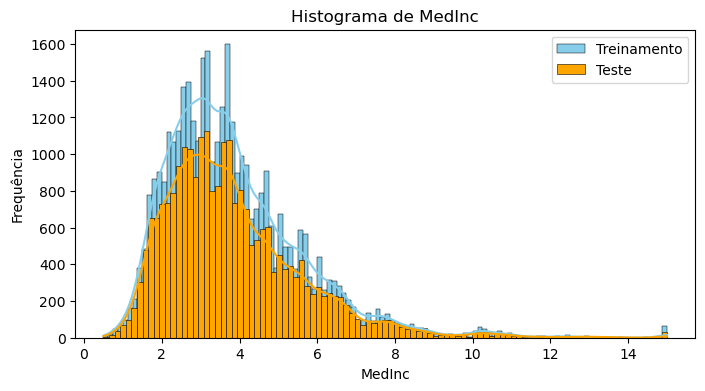

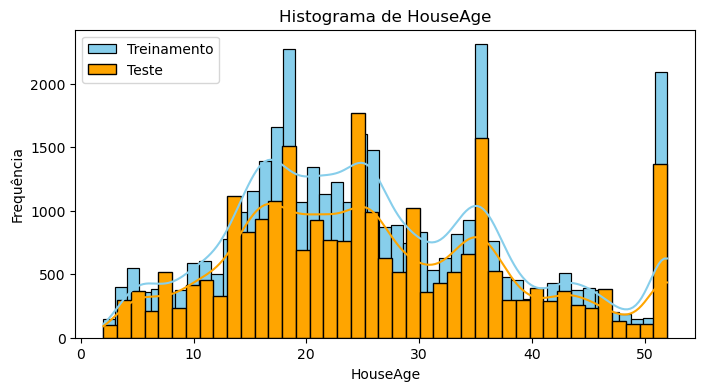

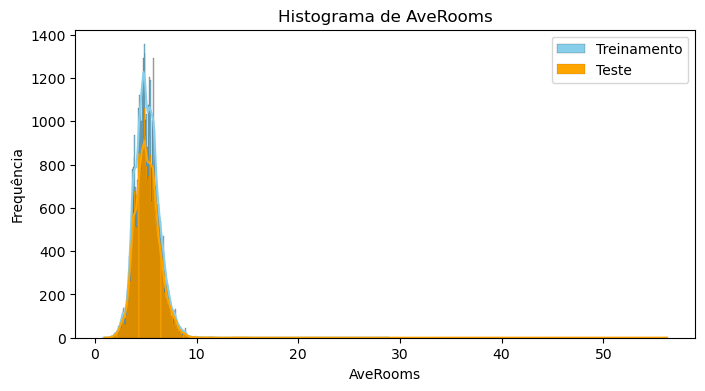

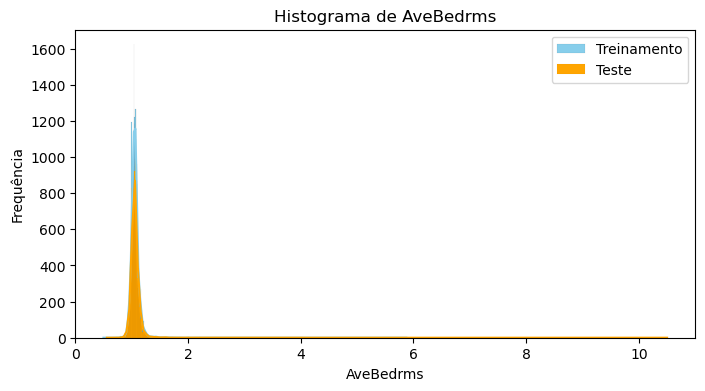

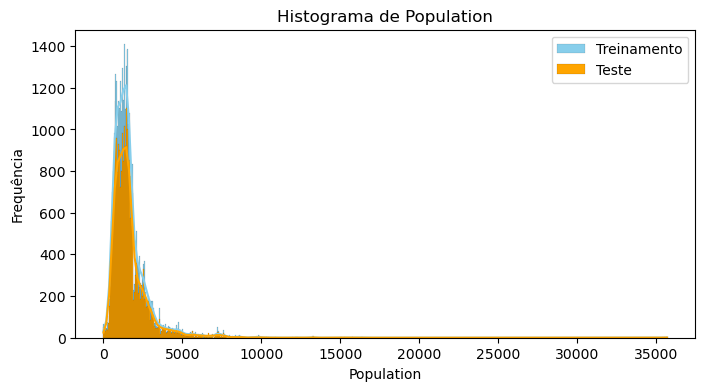

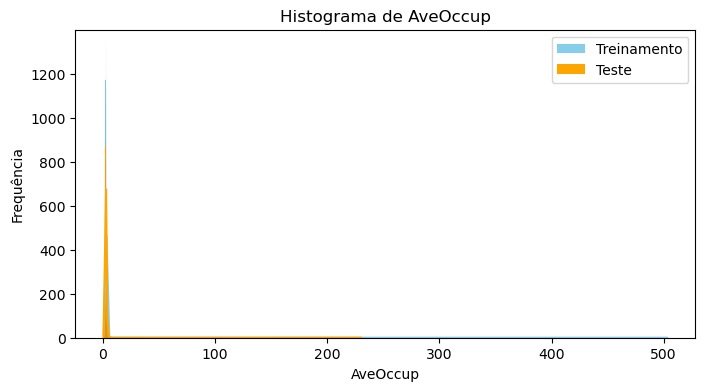

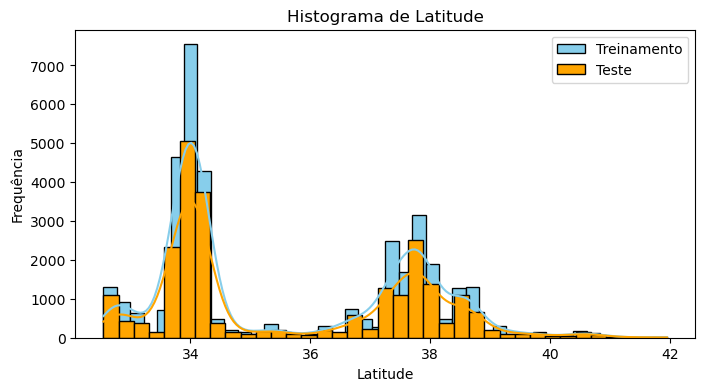

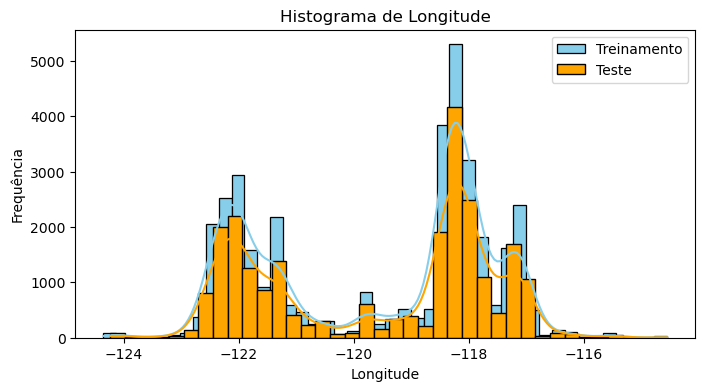

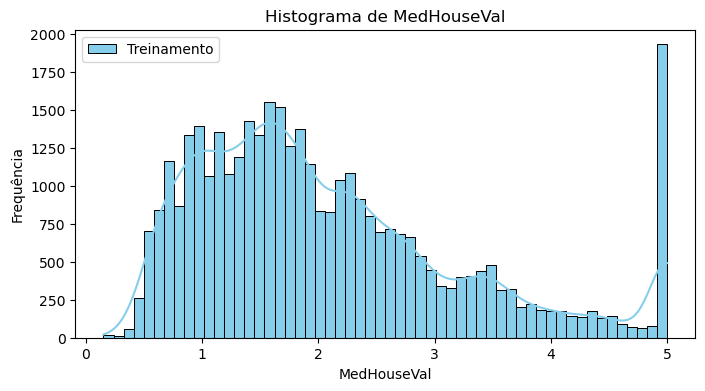

In [54]:
numerical_features = train.drop(['id'], axis=1).columns.tolist()
for col in numerical_features:
    plot_histogram(train, test, col)

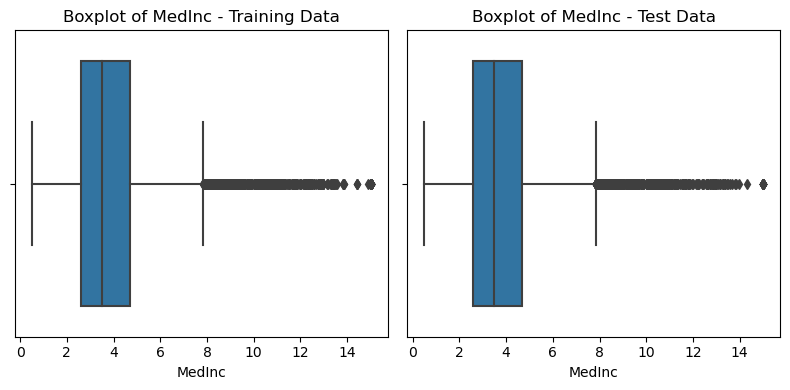

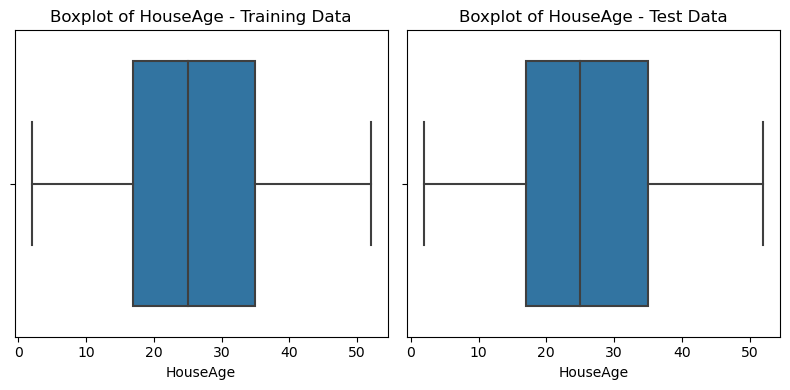

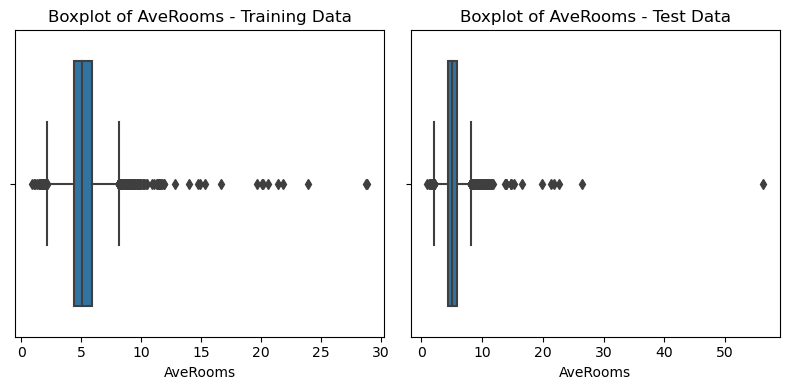

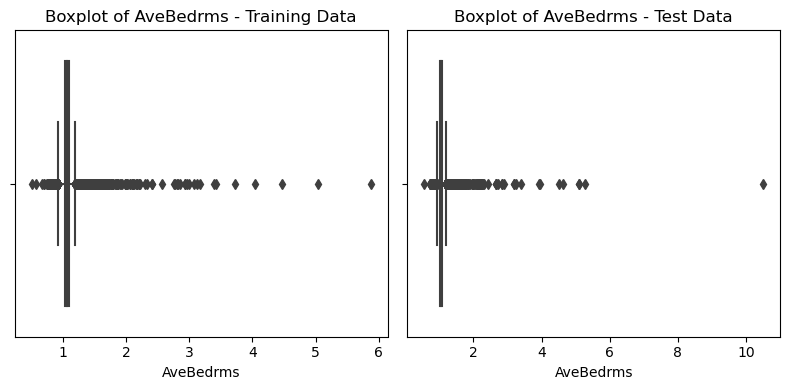

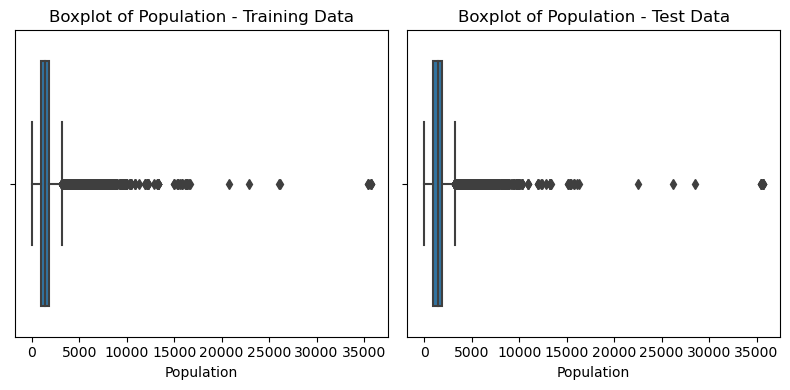

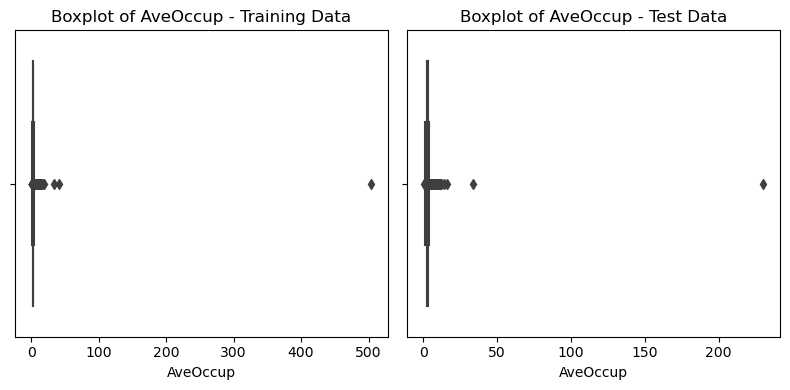

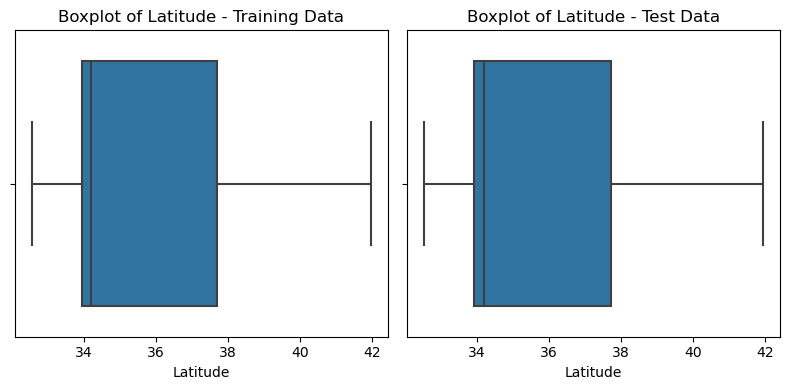

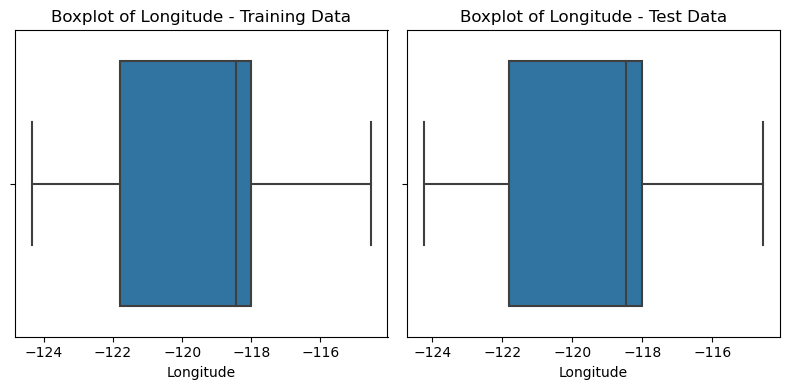

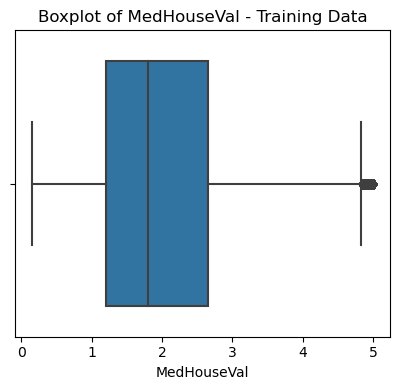

In [56]:
for col in numerical_features:
    plot_boxplot(train, test, col)

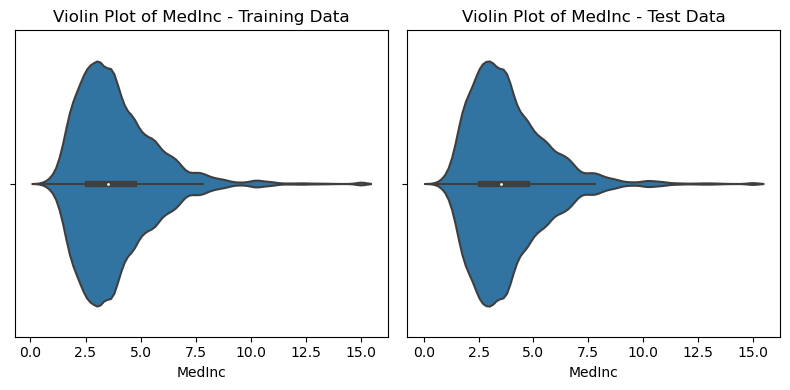

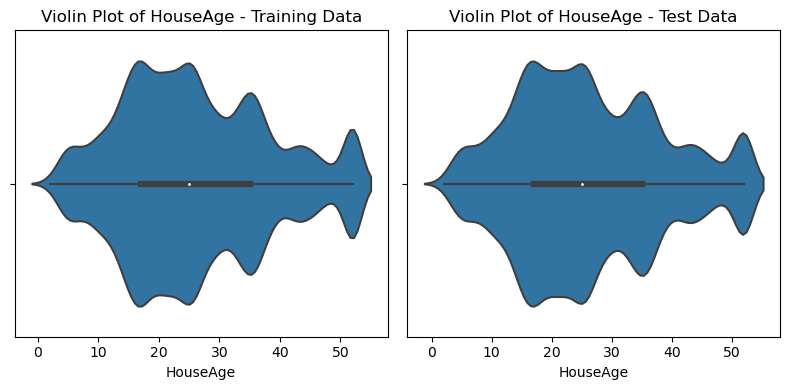

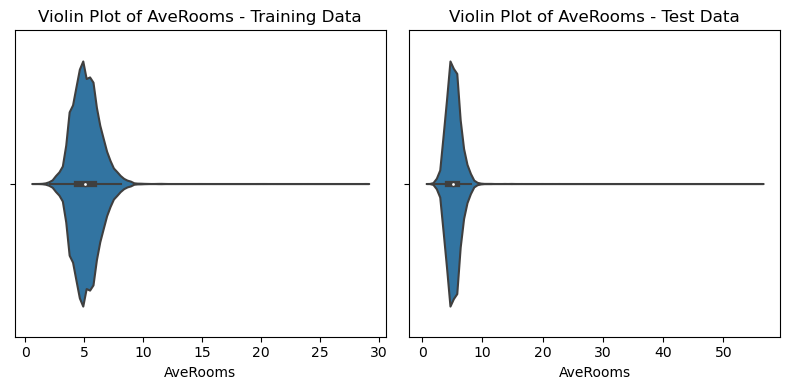

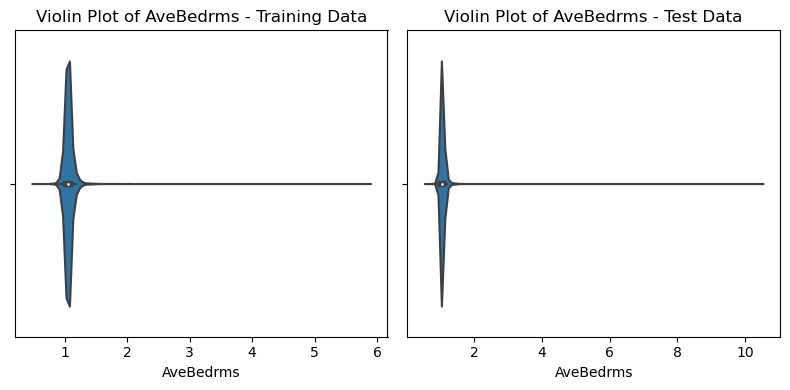

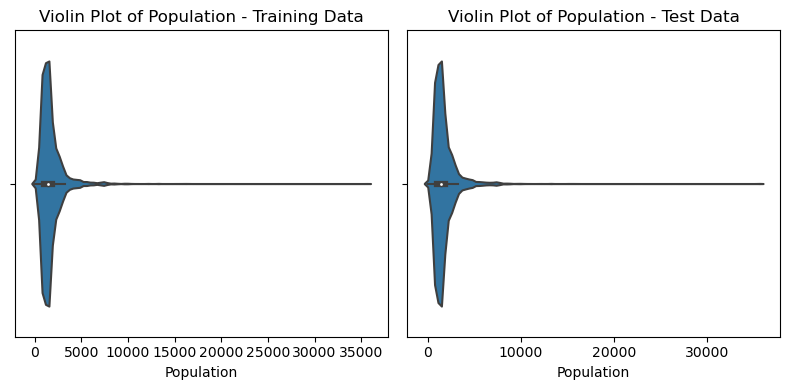

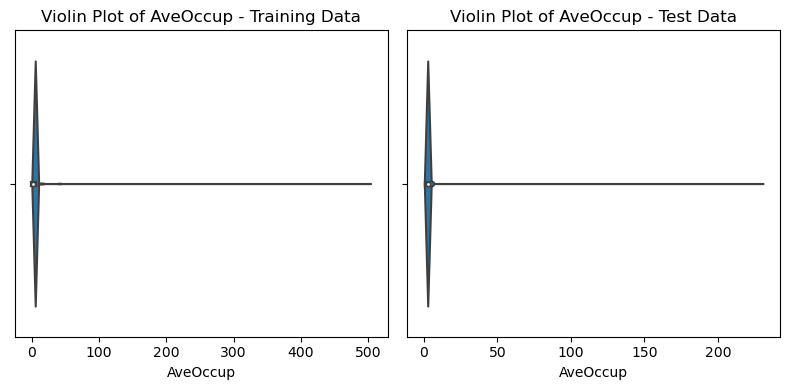

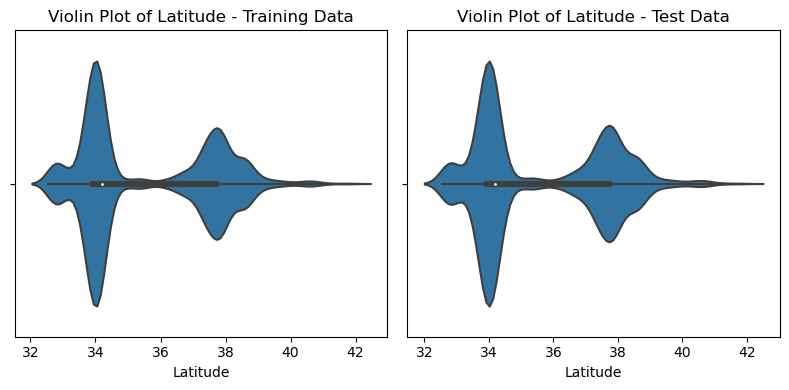

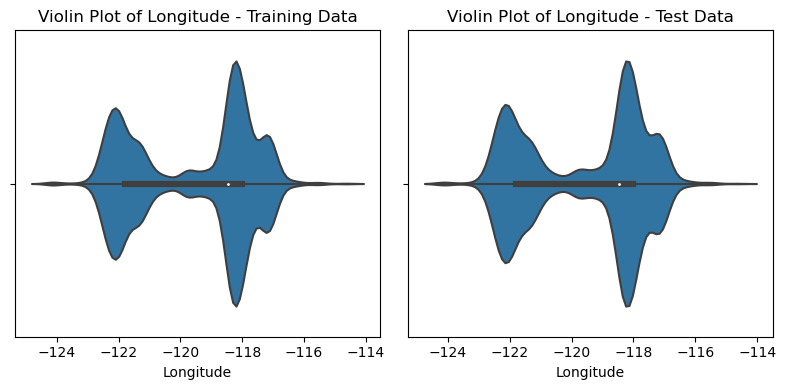

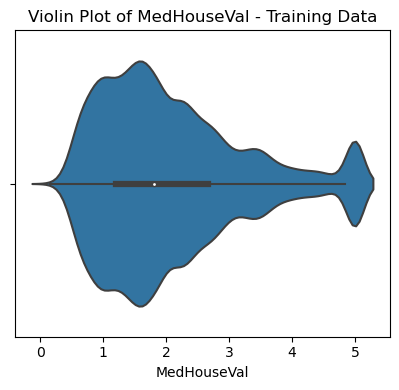

In [57]:
for col in numerical_features:
    plot_violin(train, test, col)

#### Comentários:
- Algumas variáveis apresentam boa correlação positiva com a variável resposta (MedHouseVal), como e MedInc e AveRooms


<Figure size 1600x400 with 0 Axes>

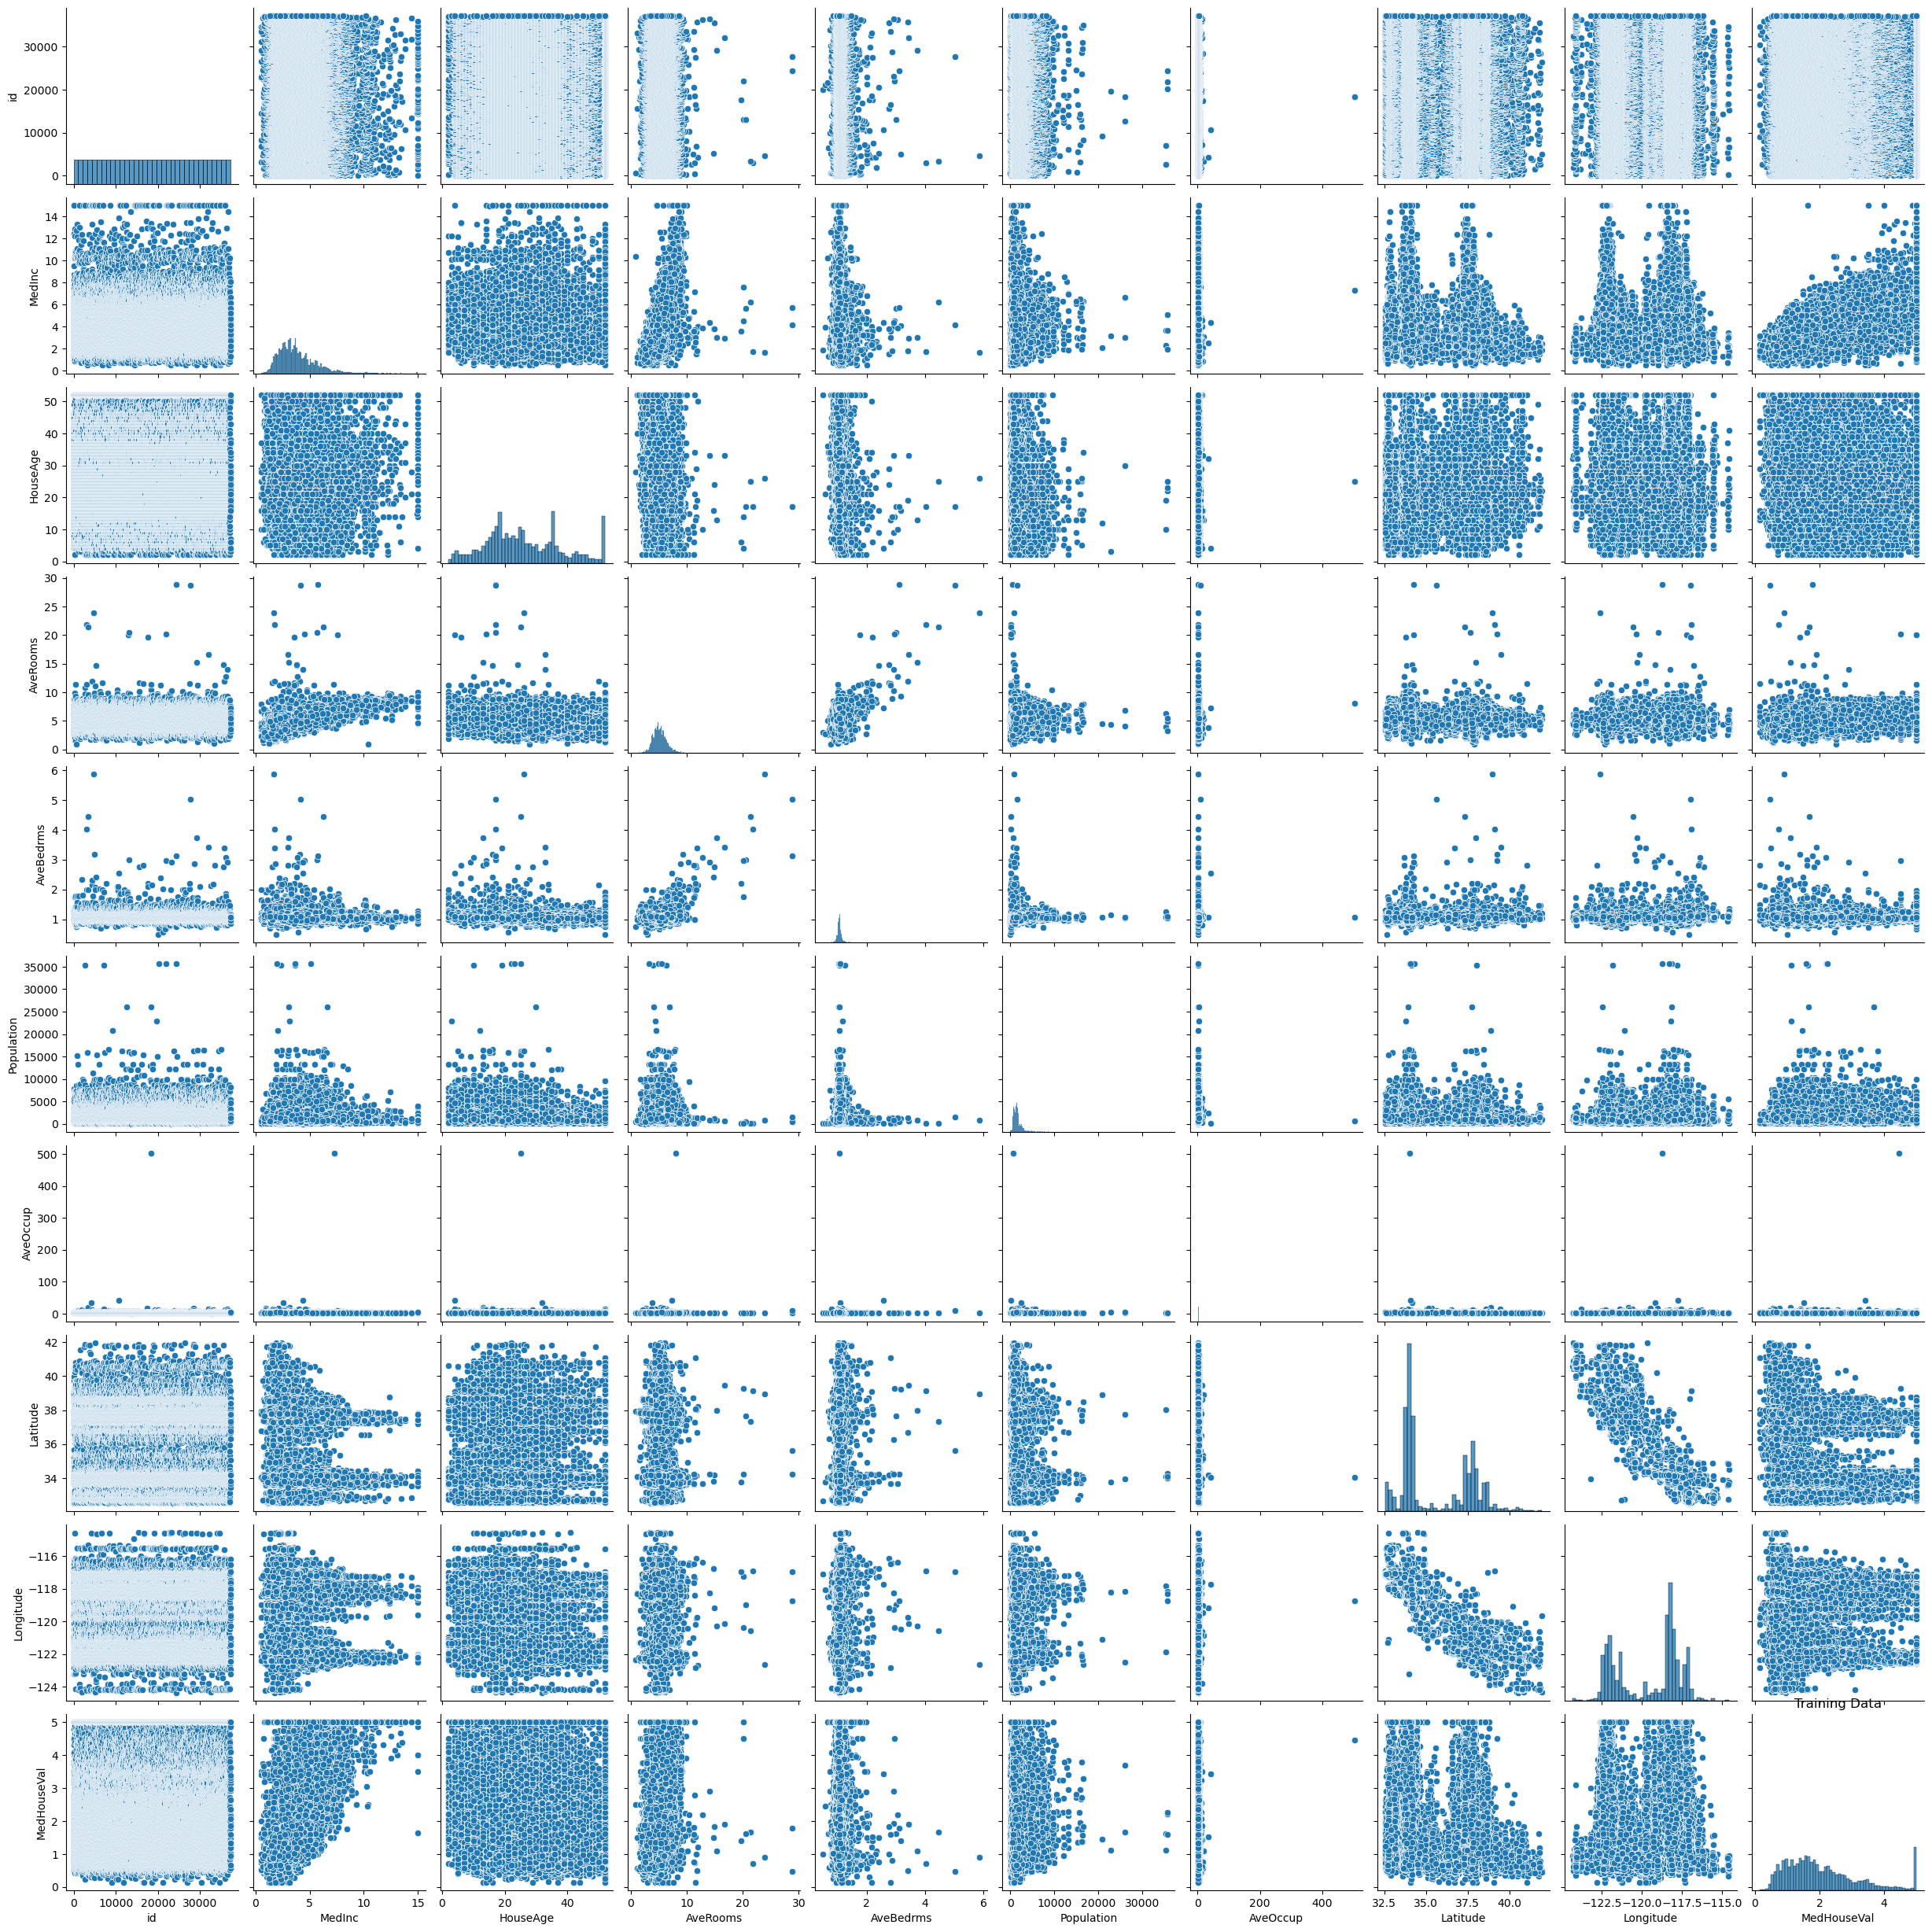

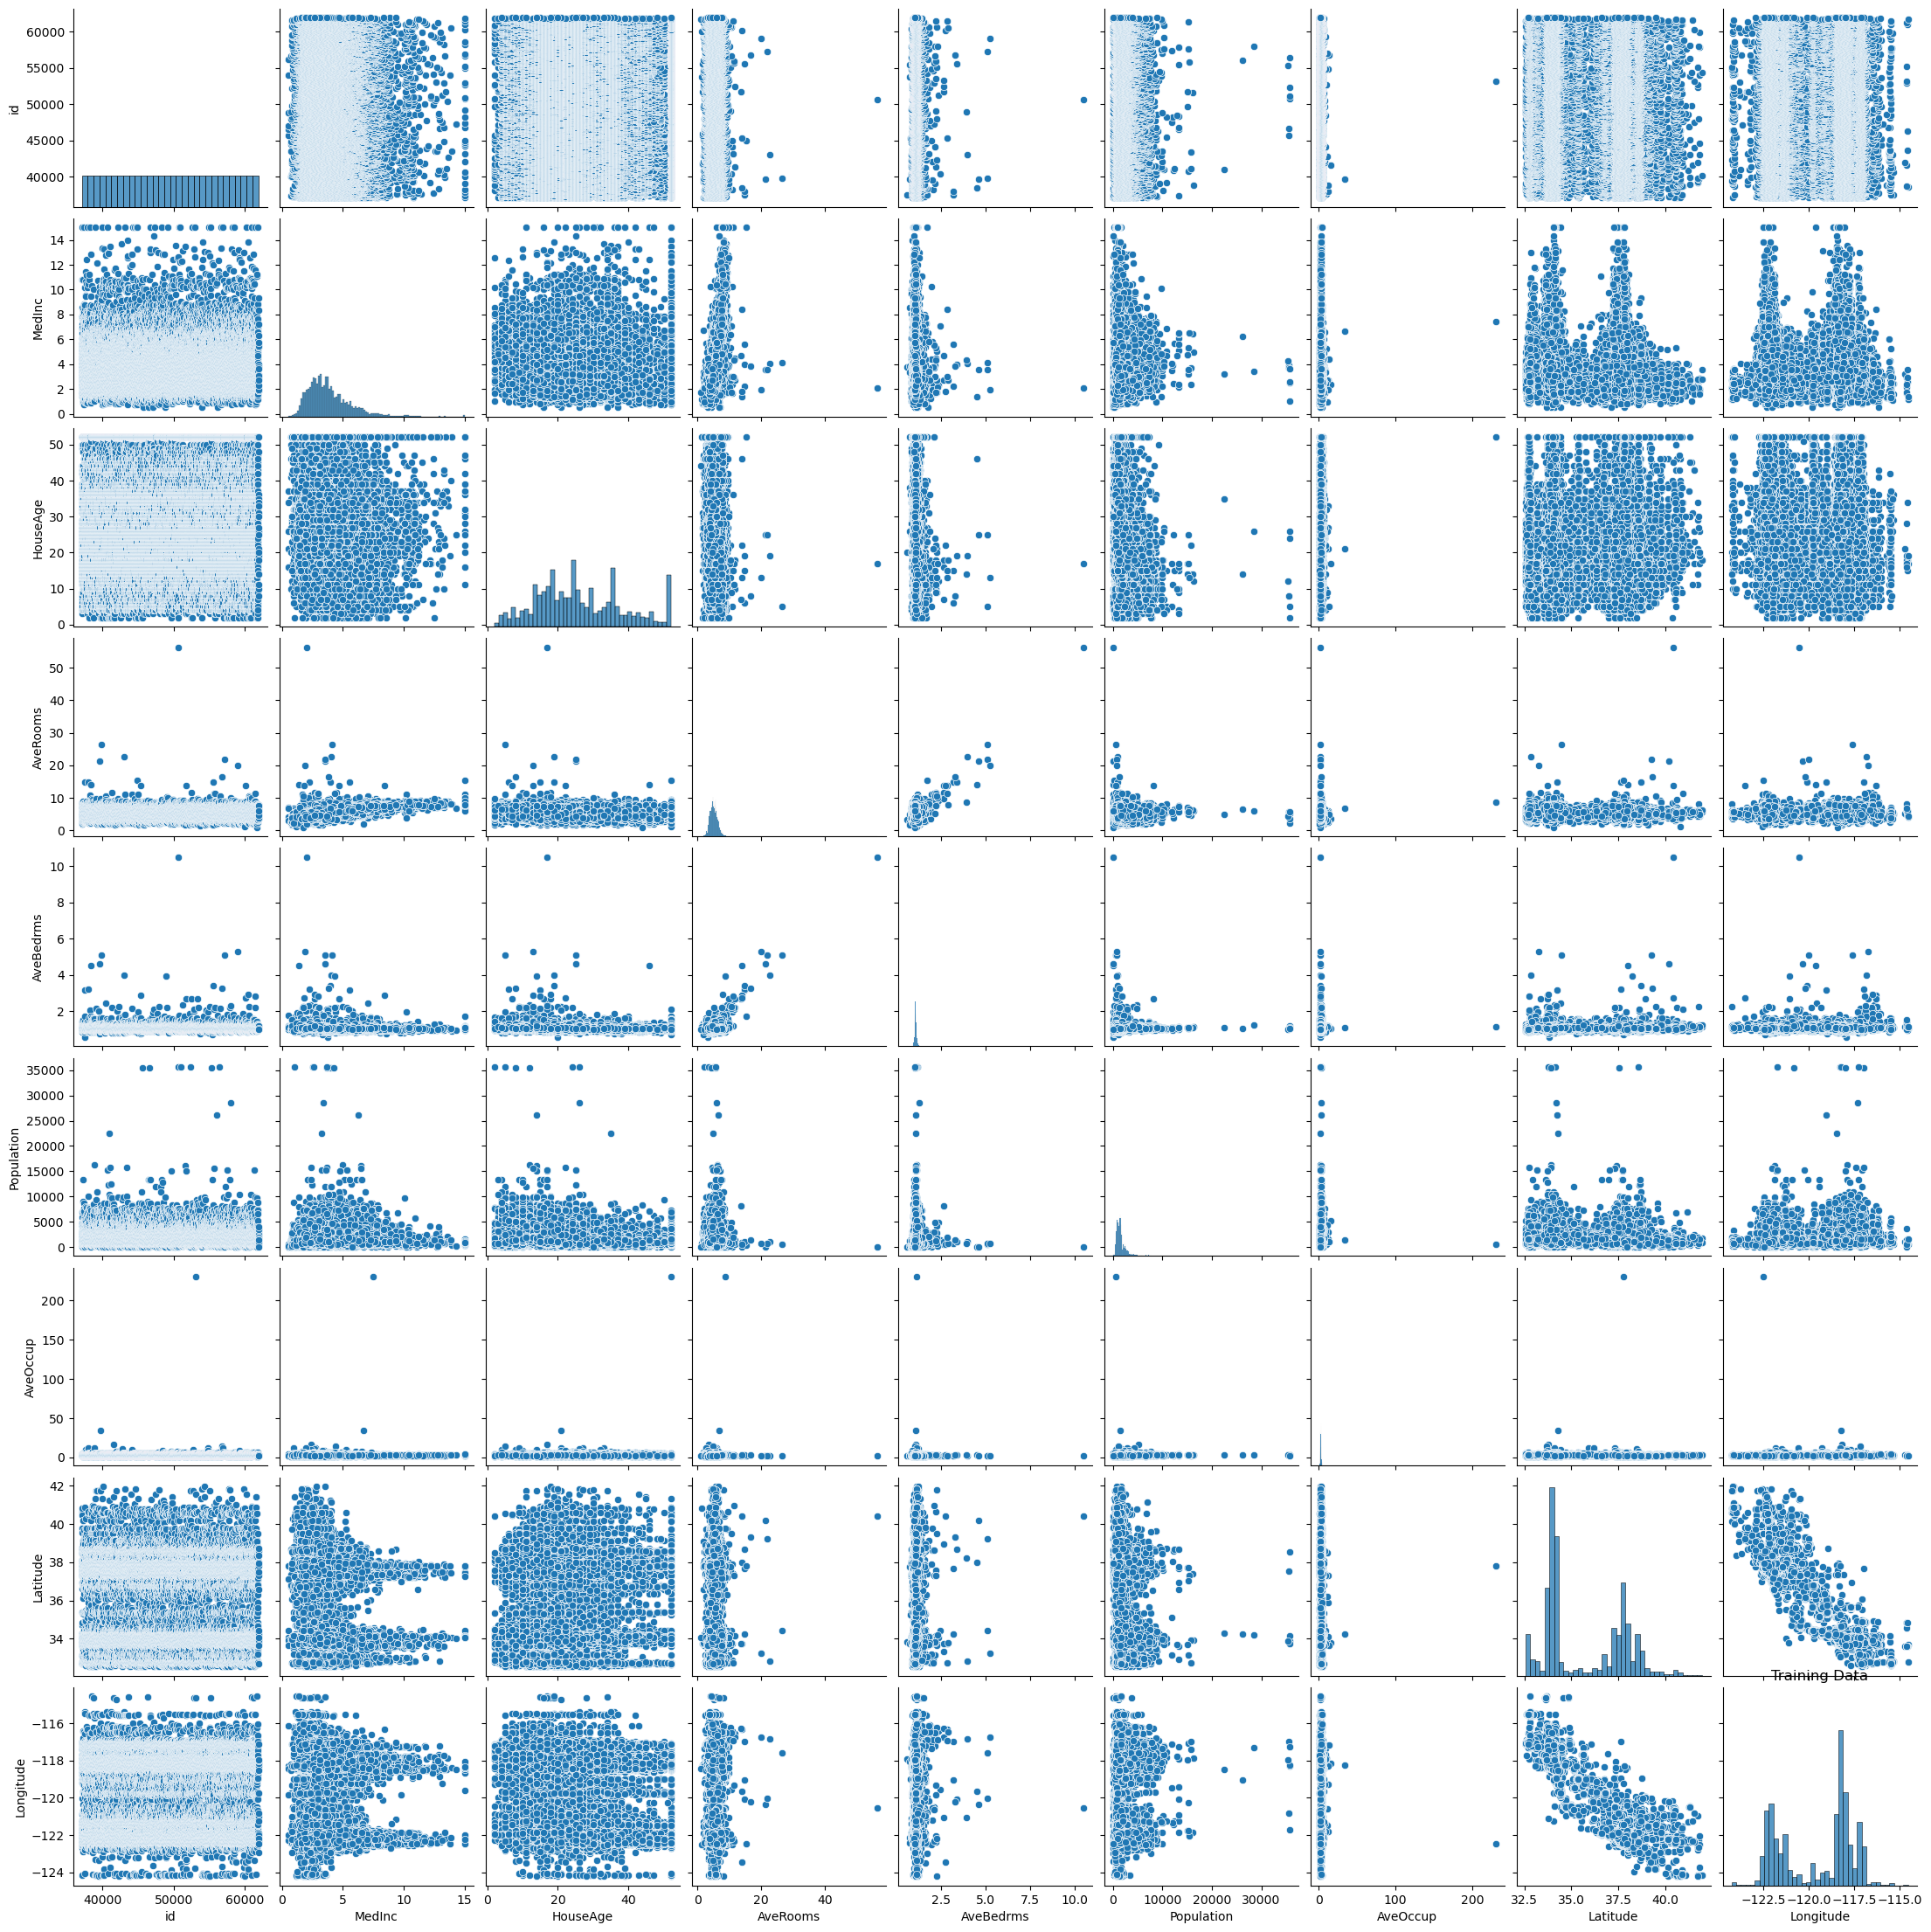

In [69]:
plot_pairplot(train, test)

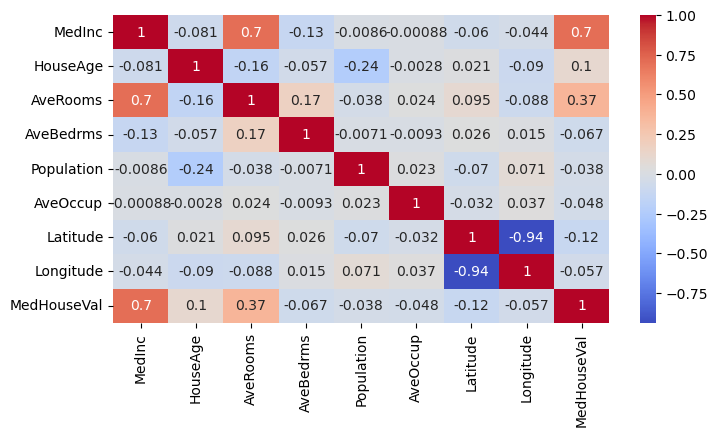

In [87]:
# Correção para os dados de trainamento
plot_heatmap(train[numerical_features])

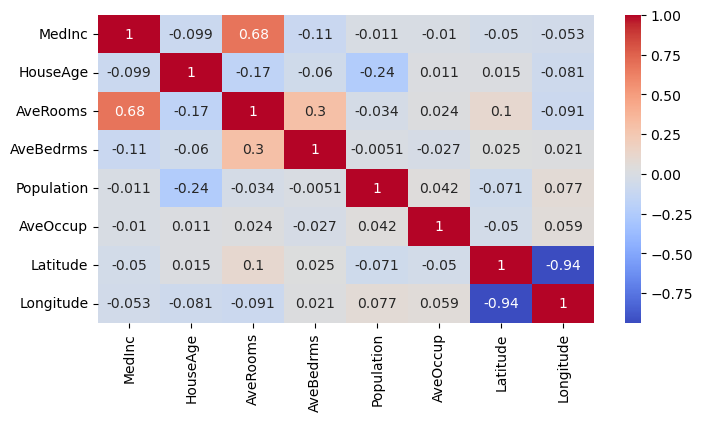

In [90]:
# Correção para os dados de teste
plot_heatmap(test[numerical_features[:-1]])

Analisando a distribuição espacial das casas, confirmamos o que os gráficos antiriores anteciparam. Pode-se observar a formação de alguns clusters populacionais em torno de (34,-118) e (38,-122). Um comportamento semelhante pode ser observado quando analisamos a distribuição espacial das idades das casas. 

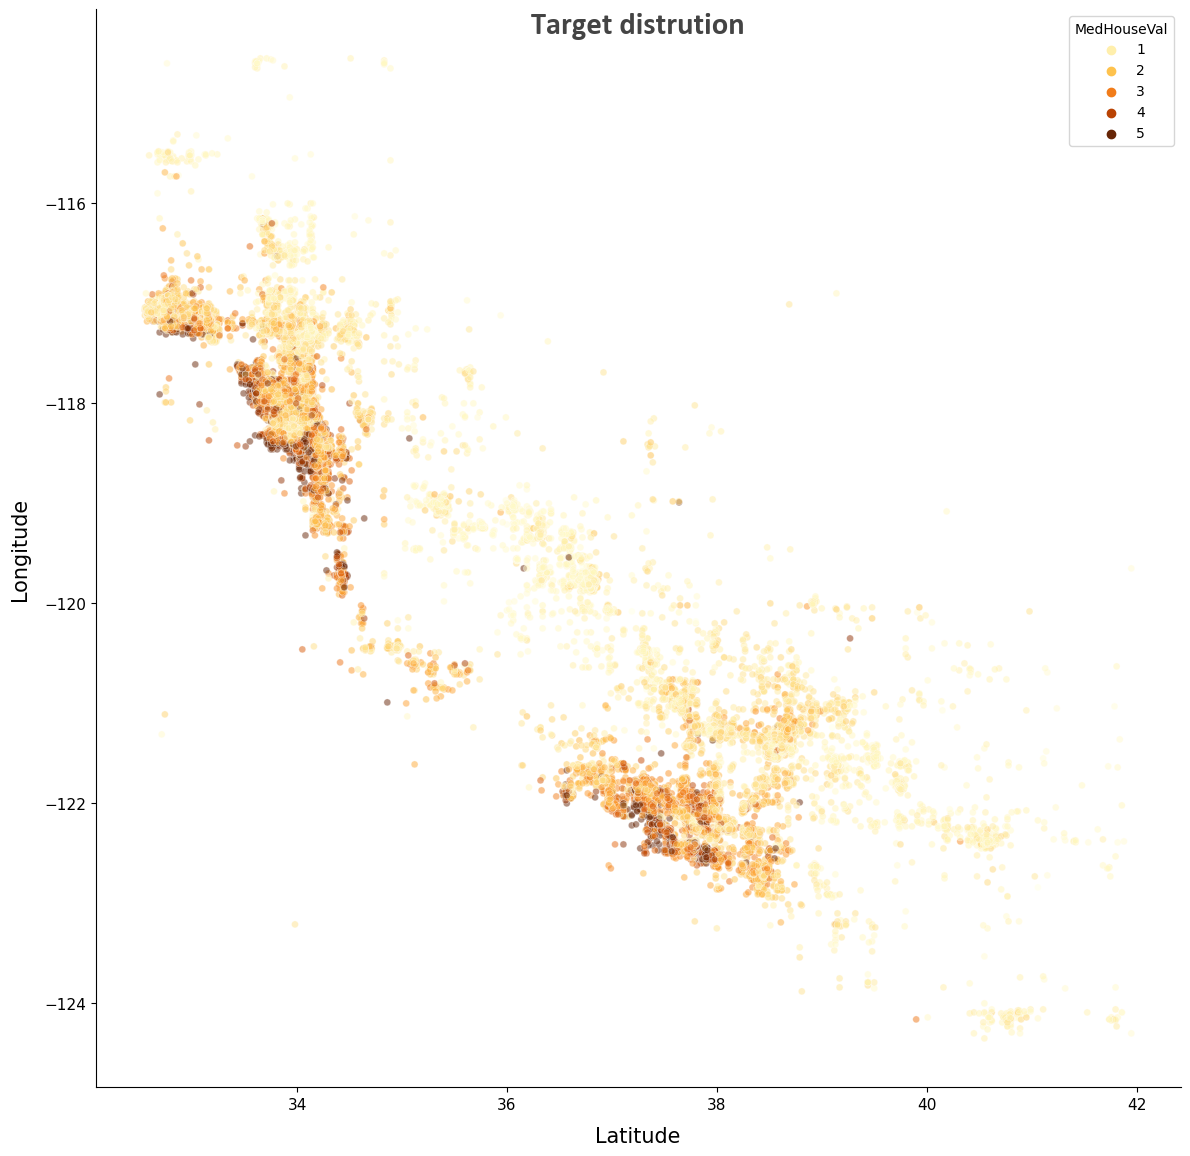

In [78]:
plt.figure(figsize=(14, 14))
plt.title('Target distrution', size=22, y=0.97, fontname='Calibri', 
          fontweight='bold', color='#444444')
a = sns.scatterplot(data=train, x='Latitude', y='Longitude', hue='MedHouseVal', 
                    palette=sns.color_palette('YlOrBr', as_cmap=True), s=25, alpha=0.5)
plt.xticks(size=11)
plt.yticks(size=11)
plt.xlabel('Latitude', labelpad=10, fontsize=15)
plt.ylabel('Longitude', labelpad=10, fontsize=15)

for j in ['right', 'top']:
    a.spines[j].set_visible(False)
    
plt.show()

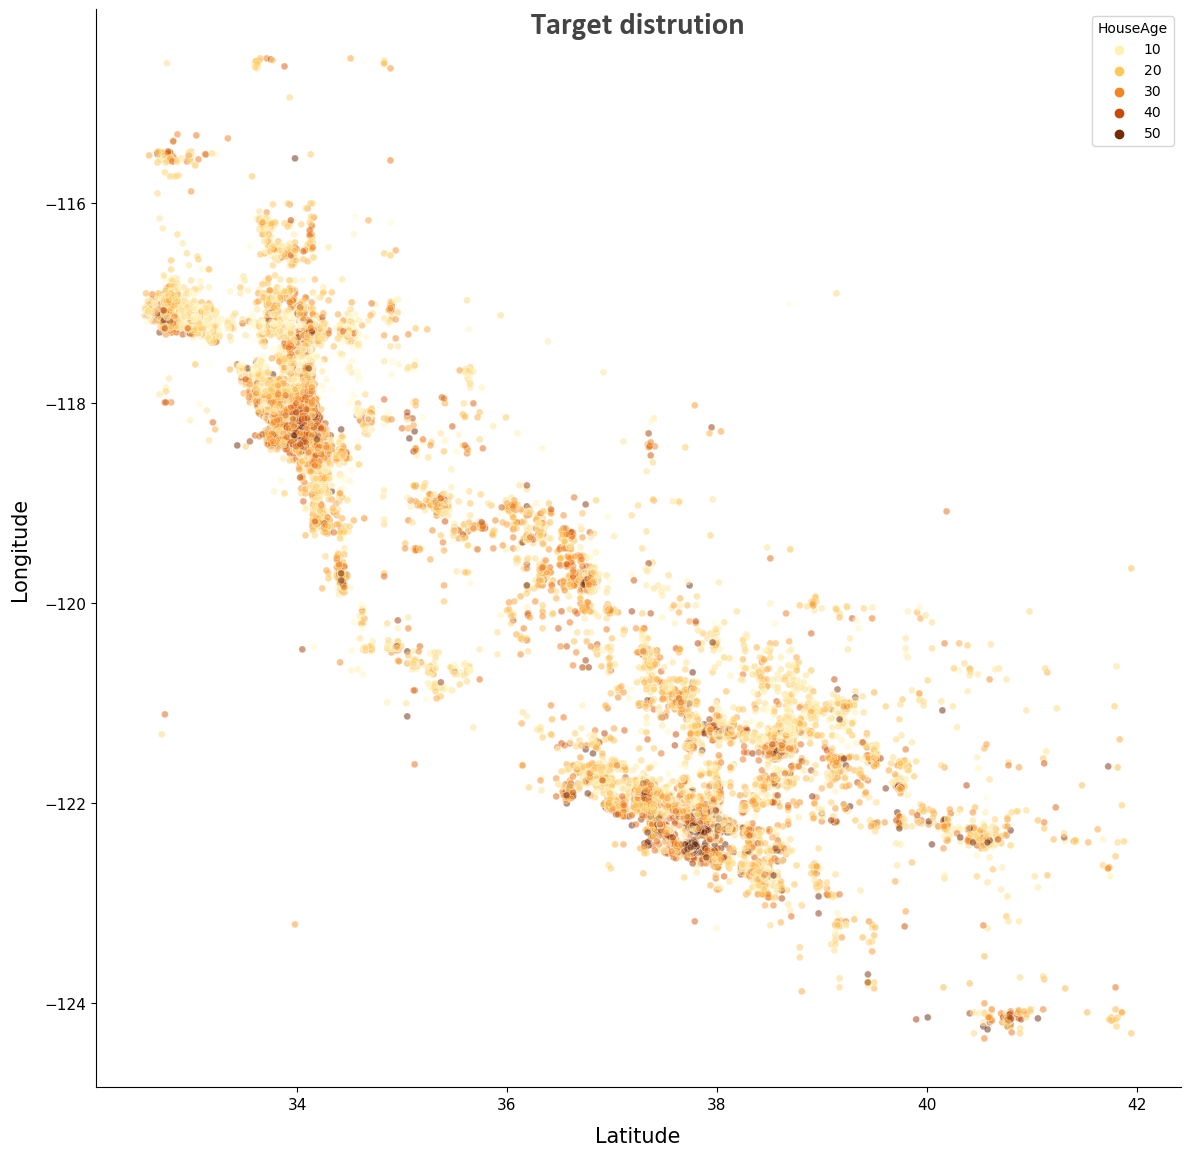

In [85]:
plt.figure(figsize=(14, 14))
plt.title('Target distrution', size=22, y=0.97, fontname='Calibri', 
          fontweight='bold', color='#444444')
a = sns.scatterplot(data=train, x='Latitude', y='Longitude', hue='HouseAge', 
                    palette=sns.color_palette('YlOrBr', as_cmap=True), s=25, alpha=0.5)
plt.xticks(size=11)
plt.yticks(size=11)
plt.xlabel('Latitude', labelpad=10, fontsize=15)
plt.ylabel('Longitude', labelpad=10, fontsize=15)

for j in ['right', 'top']:
    a.spines[j].set_visible(False)
    
plt.show()